Часть 2

4.	Найти датасет с аномальными значениями, которые можно выявить, построив диаграмму размаха «ящик с усами». Попробовать выдвинуть гипотезу о причинах аномальности, которую можно подтвердить дальнейшими исследованиями, используя синтетические признаки (или  корреляционный анализ и т.п.).

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv('house.csv')
df['LotArea'].head()

0     8450
1     9600
2    11250
3     9550
4    14260
Name: LotArea, dtype: int64

In [13]:
column_data = df['LotArea']

desc = sm.stats.DescrStatsW(column_data)

mean = desc.mean
std_dev = desc.std
variance = desc.var
median = np.median(column_data)
Q1 = np.percentile(column_data, 25)
Q3 = np.percentile(column_data, 75)
IQR = Q3 - Q1
data_range = column_data.max() - column_data.min()

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]
num_outliers = len(outliers)
percent_outliers = (num_outliers / len(column_data)) * 100

print(f"Среднее: {mean:.4f}")
print(f"Медиана: {median:.4f}")
print(f"Первый квартиль (Q1): {Q1:.4f}")
print(f"Третий квартиль (Q3): {Q3:.4f}")
print(f"Межквартильный интервал (IQR): {IQR:.4f}")
print(f"Размах: {data_range:.4f}")
print(f"Дисперсия: {variance:.4f}")
print(f"Стандартное отклонение: {std_dev:.4f}")
print(f"Количество аномалий: {num_outliers}")
print(f"Процент аномалий: {percent_outliers:.2f}%")

Среднее: 10516.8281
Медиана: 9478.5000
Первый квартиль (Q1): 7553.5000
Третий квартиль (Q3): 11601.5000
Межквартильный интервал (IQR): 4048.0000
Размах: 213945.0000
Дисперсия: 99557412.9040
Стандартное отклонение: 9977.8461
Количество аномалий: 69
Процент аномалий: 4.73%


In [14]:
z_scores = stats.zscore(column_data)
threshold = 3
outliers = np.where(np.abs(z_scores) > threshold)
print("Значения выбросов:", column_data.iloc[outliers])

Значения выбросов: 53       50271
249     159000
313     215245
335     164660
384      53107
451      70761
457      53227
661      46589
706     115149
769      53504
848      45600
1298     63887
1396     57200
Name: LotArea, dtype: int64


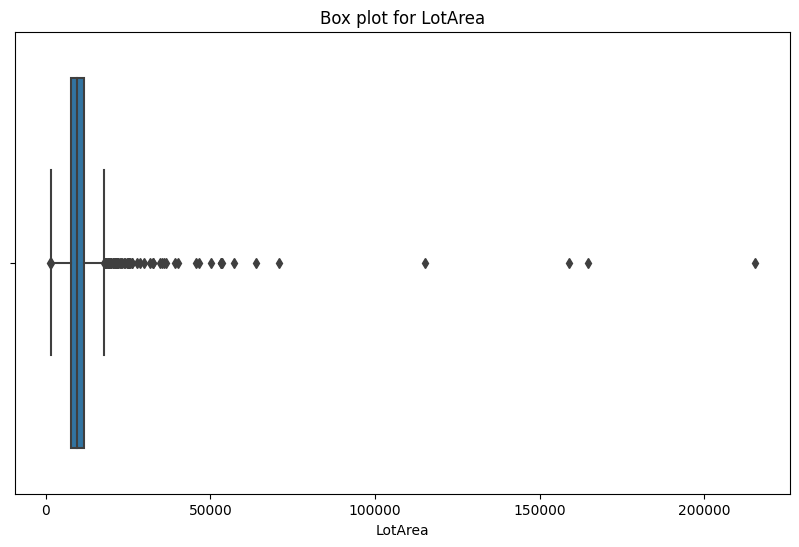

Количество выбросов: 69
      LotArea  SalePrice
53      50271     385000
66      19900     180000
113     21000     217000
120     21453     180000
159     19378     320000
...       ...        ...
1396    57200     160000
1409    20544     215000
1423    19690     274970
1430    21930     192140
1446    26142     157900

[69 rows x 2 columns]
Корреляция между LotArea и SalePrice:
            LotArea  SalePrice
LotArea    1.000000   0.263843
SalePrice  0.263843   1.000000


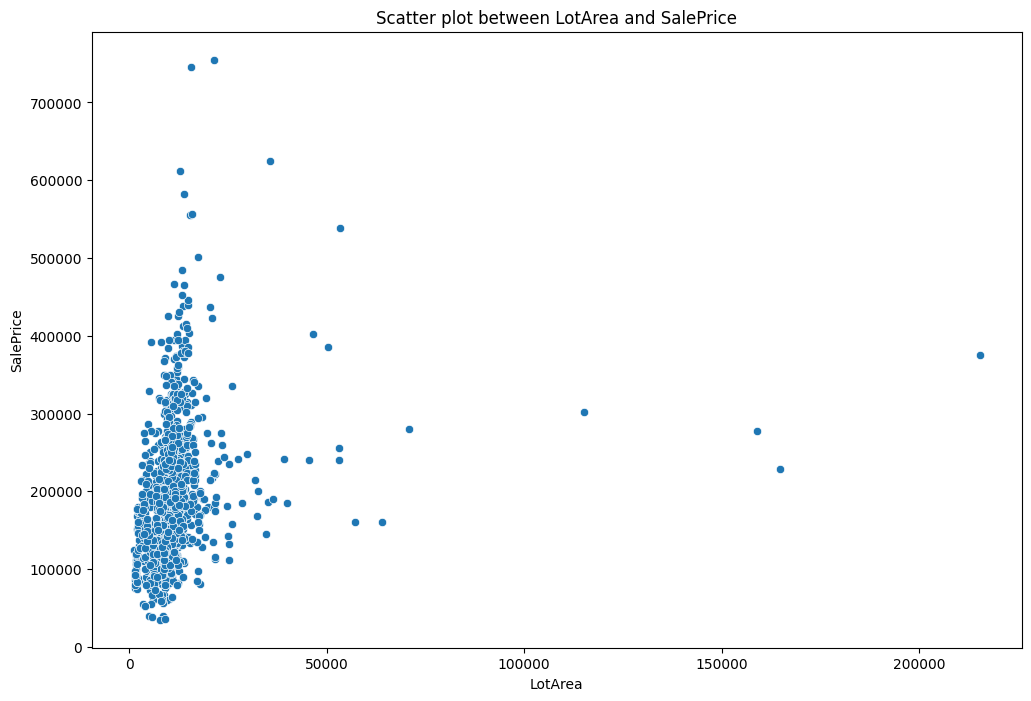

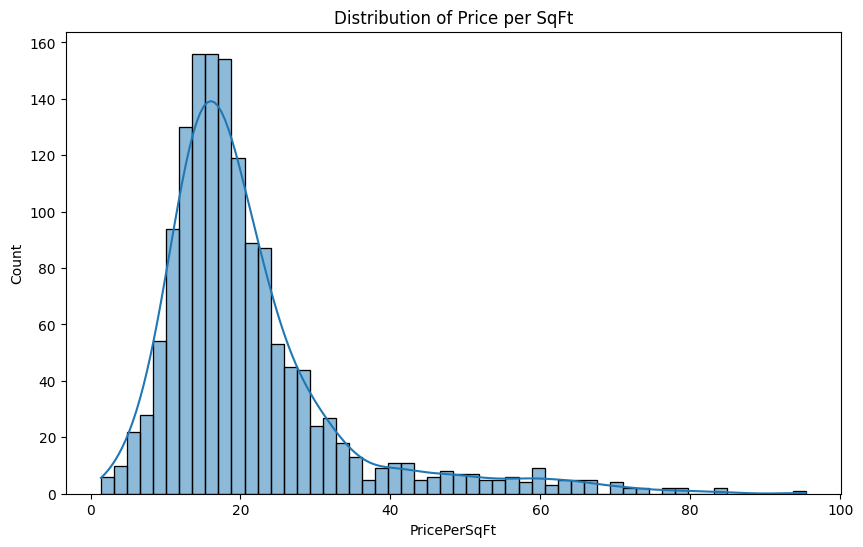

Корреляция нового признака (PricePerSqFt) с ценой дома:               PricePerSqFt  SalePrice
PricePerSqFt      1.000000   0.273401
SalePrice         0.273401   1.000000


In [17]:
column = 'LotArea'

plt.figure(figsize=(10, 6))
sns.boxplot(x=df[column])
plt.title(f'Box plot for {column}')
plt.show()

Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Выводим строки с выбросами
outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
print(f"Количество выбросов: {len(outliers)}")
print(outliers[[column, 'SalePrice']])

# Гипотеза: Высокие значения площади участка (LotArea) могут быть связаны с необычно низкими ценами на дома, что может указывать на необходимость ремонта или расположение в неблагоприятных районах.

# Проверим корреляцию между LotArea и SalePrice
correlation = df[[column, 'SalePrice']].corr()
print("Корреляция между LotArea и SalePrice:")
print(correlation)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=df[column], y=df['SalePrice'])
plt.title(f'Scatter plot between {column} and SalePrice')
plt.show()

df['PricePerSqFt'] = df['SalePrice'] / df['LotArea']

plt.figure(figsize=(10, 6))
sns.histplot(df['PricePerSqFt'], kde=True)
plt.title('Distribution of Price per SqFt')
plt.show()

print(f"Корреляция нового признака (PricePerSqFt) с ценой дома: {df[['PricePerSqFt', 'SalePrice']].corr()}")


1. Box Plot (Ящик с усами для LotArea):

- На диаграмме видно, что есть несколько явных выбросов в правой части распределения.

- Значения площади участка (LotArea) больше 150000 квадратных футов являются аномальными, так как они значительно превышают типичные значения для данного набора данных.

2. Scatter Plot (Диаграмма рассеяния LotArea и SalePrice):

- Диаграмма показывает слабую положительную корреляцию между площадью участка (LotArea) и ценой дома (SalePrice).

- То есть, чем больше площадь участка, тем выше цена дома, но эта зависимость не является сильной.

- Некоторые точки в правой части графика (LotArea > 150000) показывают, что дома с очень большой площадью участка не всегда пропорционально дороже.

- Эти точки могут указывать на возможные выбросы или необычные случаи.

Гипотеза: Дома с большой площадью участка (выше 150000 кв. футов), которые имеют непропорционально низкую цену, могут находиться в плохом состоянии или в менее престижных районах, что и объясняет такую низкую цену.

3. Распределение синтетического признака PricePerSqFt (цена за квадратный фут):

- Распределение этого признака имеет нормальную форму, что подтверждает его полезность для дальнейшего анализа.

- Цена за квадратный фут (PricePerSqFt) коррелирует с ценой продажи (SalePrice) на уровне 0.273, что указывает на слабую зависимость.

- Дома с большой площадью участка могут иметь меньшую цену за квадратный фут, что подтверждает гипотезу о том, что большие участки не всегда стоят пропорционально больше.

4. Вывод: Созданный синтетический признак (PricePerSqFt) показывает, что цена за квадратный фут имеет слабую корреляцию с общей ценой дома, что поддерживает гипотезу о том, что аномалии могут быть вызваны состоянием дома или другими факторами, влияющими на конечную цену.